<a href="https://colab.research.google.com/github/Sanim27/Torch/blob/main/TransferLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading models using torchvision.models

In [1]:
import torchvision.models as models
alexnet=models.alexnet(num_classes=2)

In [2]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [3]:
resnet=models.resnet50(num_classes=2)
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Loading models using pytorch hub

In [4]:
import torch

In [5]:
model=torch.hub.load('pytorch/vision','resnet50',pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 63.9MB/s]


### It is better to load using torch.hub.load as the repo 'pytorch/vision' contains models from places other than torchvision as well

In [6]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Since resnet50 has 1000 output classes and we have just 2(cat/fish) , we must change the last fully connected layer for transfer learning.

In [7]:
import torch.nn as nn
import torch.nn.functional as F
num_classes=2
model.fc=nn.Linear(model.fc.in_features,num_classes)

We just want the last layer to be learnt hence we should freeze the layers before.

In [8]:
for param in model.parameters():
  param.requires_grad=False

for param in model.fc.parameters():
  param.requires_grad=True

In [9]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = '/content/images.zip'
extraction_dir = '/content/'  # Extract to root content directory, it will maintain train/, test/, and val/ folders

# Unzip the file, preserving the folder structure
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Files extracted to: {extraction_dir}")

Files extracted to: /content/


In [11]:
import torchvision
from torchvision import transforms
train_data_path='./train/'
transforms=transforms.Compose(
    [
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485,0.456,0.406],
            std=[0.229,0.224,0.225]
            )
    ]
)

train_data=torchvision.datasets.ImageFolder(root=train_data_path,transform=transforms)

In [12]:
val_path='./val/'
test_path='./test/'
val_data=torchvision.datasets.ImageFolder(root=val_path,transform=transforms)
test_data=torchvision.datasets.ImageFolder(root=test_path,transform=transforms)

In [13]:
batch_size=64
train_data_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True)
val_data_loader=torch.utils.data.DataLoader(val_data,batch_size=batch_size,shuffle=False)
test_data_loader=torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [14]:
import torch.optim as optim
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [15]:
if torch.cuda.is_available():
  print('cuda')
  device=torch.device('cuda')
else:
  device=torch.device('cpu')
  print('cpu')
model.to(device)

cuda


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:
def train(model,optimizer,loss_fn,train_loader,val_loader,epochs=20,device='cpu'):
  for epoch in range(epochs):
    training_loss=0.0
    valid_loss=0.0
    model.train()
    for batch in train_loader:
      optimizer.zero_grad()
      inputs,targets=batch
      inputs=inputs.to(device)
      targets=targets.to(device)
      output=model(inputs)
      loss=loss_fn(output,targets)
      loss.backward()
      optimizer.step()
      training_loss+=loss.item()
    training_loss/=len(train_loader)

    model.eval()
    num_correct=0
    num_examples=0

    with torch.no_grad():
      for batch in val_loader:
        inputs,targets=batch
        inputs=inputs.to(device)    # zero_grad() is not needed since model weights are not updated during validation.
        output=model(inputs)
        targets=targets.to(device)
        loss=loss_fn(output,targets)
        valid_loss+=loss.data.item()
        correct = torch.eq(torch.max(output, dim=1)[1], targets).view(-1)

        num_correct += torch.sum(correct).item()
        num_examples+=correct.shape[0]
    valid_loss/=len(val_loader)
    print('Epoch: {}, Training loss: {:.2f}, Validation loss: {:.2f}, accuracy: {:.2f}'.format(epoch,training_loss,valid_loss,num_correct/num_examples))

In [26]:
import os
from PIL import Image
from torchvision import datasets
from torch.utils.data import DataLoader

def remove_corrupted_images(image_folder):
    """
    Removes corrupted images from the given folder and prints the names of corrupted files.
    """
    corrupted_files = []
    # Get a list of all image files in the directory
    all_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

    # Loop through each file in the directory
    for filename in all_files:
        file_path = os.path.join(image_folder, filename)

        # Check if the file is an image
        if file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                # Try to open the image file
                img = Image.open(file_path)
                img.verify()  # Verify the image integrity
                img.close()   # Close the image after verification
            except (IOError, SyntaxError) as e:
                # If there's an error, append to the list and remove the file
                corrupted_files.append(file_path)
                os.remove(file_path)
                print(f"Corrupted image file removed: {file_path}")

    # Return the list of corrupted files for reference
    return corrupted_files

# Remove corrupted images from train, validation, and test directories
corrupted_cats = remove_corrupted_images('/content/train/cat')
corrupted_fish = remove_corrupted_images('/content/train/fish')
corrupted_val_cats = remove_corrupted_images('/content/val/cat')
corrupted_val_fish = remove_corrupted_images('/content/val/fish')
corrupted_test_cats = remove_corrupted_images('/content/test/cat')
corrupted_test_fish = remove_corrupted_images('/content/test/fish')

print(f"Total corrupted train cat images removed: {len(corrupted_cats)}")
print(f"Total corrupted train fish images removed: {len(corrupted_fish)}")
print(f"Total corrupted val cat images removed: {len(corrupted_val_cats)}")
print(f"Total corrupted val fish images removed: {len(corrupted_val_fish)}")
print(f"Total corrupted test cat images removed: {len(corrupted_test_cats)}")
print(f"Total corrupted test fish images removed: {len(corrupted_test_fish)}")

# After removing corrupted images, reinitialize the ImageFolder datasets
def reload_image_folder(train_dir, val_dir, test_dir, transform):
    train_dataset = datasets.ImageFolder(train_dir, transform=transform)
    val_dataset = datasets.ImageFolder(val_dir, transform=transform)
    test_dataset = datasets.ImageFolder(test_dir, transform=transform)
    return train_dataset, val_dataset, test_dataset

# Example usage assuming transform is defined and applied during the data loading process
train_dataset, val_dataset, test_dataset = reload_image_folder('/content/train', '/content/val', '/content/test', transforms)

# Now you can recreate the DataLoader with the refreshed datasets
train_data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_data_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Total corrupted train cat images removed: 0
Total corrupted train fish images removed: 0
Total corrupted val cat images removed: 0
Total corrupted val fish images removed: 0
Total corrupted test cat images removed: 0
Total corrupted test fish images removed: 0


In [19]:
train(model, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, epochs=20, device=device)

Epoch: 0, Training loss: 0.53, Validation loss: 0.47, accuracy: 0.75
Epoch: 1, Training loss: 0.30, Validation loss: 0.41, accuracy: 0.85
Epoch: 2, Training loss: 0.31, Validation loss: 0.40, accuracy: 0.82
Epoch: 3, Training loss: 0.21, Validation loss: 0.36, accuracy: 0.85
Epoch: 4, Training loss: 0.23, Validation loss: 0.33, accuracy: 0.90
Epoch: 5, Training loss: 0.19, Validation loss: 0.39, accuracy: 0.80
Epoch: 6, Training loss: 0.20, Validation loss: 0.40, accuracy: 0.82
Epoch: 7, Training loss: 0.19, Validation loss: 0.36, accuracy: 0.88
Epoch: 8, Training loss: 0.22, Validation loss: 0.31, accuracy: 0.87
Epoch: 9, Training loss: 0.20, Validation loss: 0.33, accuracy: 0.87
Epoch: 10, Training loss: 0.15, Validation loss: 0.33, accuracy: 0.89
Epoch: 11, Training loss: 0.16, Validation loss: 0.43, accuracy: 0.79
Epoch: 12, Training loss: 0.24, Validation loss: 0.35, accuracy: 0.81
Epoch: 13, Training loss: 0.19, Validation loss: 0.33, accuracy: 0.86
Epoch: 14, Training loss: 0.13

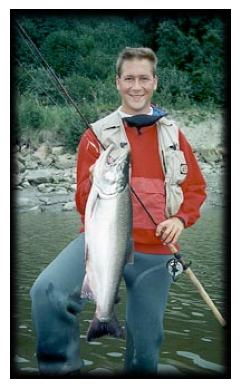

fish


In [27]:
from PIL import Image
import matplotlib.pyplot as plt
labels = ['cat', 'fish']
img_path = '/content/test/fish/ninsilver.jpg'
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()
img = transforms(img)
img = img.unsqueeze(0).to(device)
model.eval()
with torch.no_grad():
    prediction = model(img)
prediction = prediction.argmax(dim=1).item()
print(labels[prediction])